# 研制报告识别
## 1. 配置PaddleOCR环境
### 1.1 下载PaddleOCR代码库
从GIT下载OCR Repository,用于后期数据加载、数据处理、模型训练的目录。 gitee下载速度快，定位到当前目录，持久化改变路径用%cd path.

In [1]:
%cd work/
!git clone https://gitee.com/paddlepaddle/PaddleOCR.git

/home/aistudio/work
正克隆到 'PaddleOCR'...
remote: Enumerating objects: 35352, done.
remote: Counting objects: 100% (9731/9731), done.
remote: Compressing objects: 100% (3798/3798), done.
remote: Total 35352 (delta 6759), reused 8572 (delta 5828), pack-reused 25621
接收对象中: 100% (35352/35352), 313.53 MiB | 336.00 KiB/s, 完成.
处理 delta 中: 100% (24620/24620), 完成.
检查连接... 完成。


### 1.2 安装PaddleOCR依赖项

直接从requirement中逐项安装即可 pip install -r requirements.tx

In [1]:
%cd ~/work/PaddleOCR
# 安装依赖库
!pip install -r requirements.txt -i https://mirror.baidu.com/pypi/simple
# 安装PaddleNLP whl包
!pip install --upgrade paddlenlp
# 安装pdf转图片包
!pip install fitz PyMuPDF

/home/aistudio/work/PaddleOCR
Looking in indexes: https://mirror.baidu.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 KB 12.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.5/603.5 KB 15.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 6.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 6.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 5.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 435.9 kB/s eta 0:00:00a 0:00

## 2. 文本检测与识别
### 2.1 加载训练与测试数据
数据集主要从AIStudio上的公开数据集获取，数据集比较规范，可以避免对数据的后期处理（若有必要也需要对数据进行处理，包含分割、规范化等）

从数据集解压数据，并复制到work/PaddleOCR/train_data目录下，数据包含训练数据与测试数据，数据格式为：

路径/xx.jpeg[tab]json描述
![image.png](attachment:5a13c329-9be8-4eb4-8333-85a9c93ad3a6.png)

In [4]:
%cd ~
%cd data/data110391/
!unzip -oq Research_val.zip 
!unzip -oq Research_train.zip
%cd ~ 
!mkdir work/PaddleOCR/train_data
!mv data/data110391/Research_val/  ~/work/PaddleOCR/train_data/
!mv data/data110391/Research_train/  ~/work/PaddleOCR/train_data/
%cd work/PaddleOCR/

/home/aistudio
/home/aistudio/data/data110391
/home/aistudio
/home/aistudio/work/PaddleOCR


### 2.2 预训练模型下载
预训练模型可降低后期训练的成本，PP-OCR提供了多种预训练模型,针对[ResNEt](https://github.com/PaddlePaddle/PaddleClas/blob/release/2.1/README_cn.md#ResNet%E5%8F%8A%E5%85%B6Vd%E7%B3%BB%E5%88%97),部分示意如下：
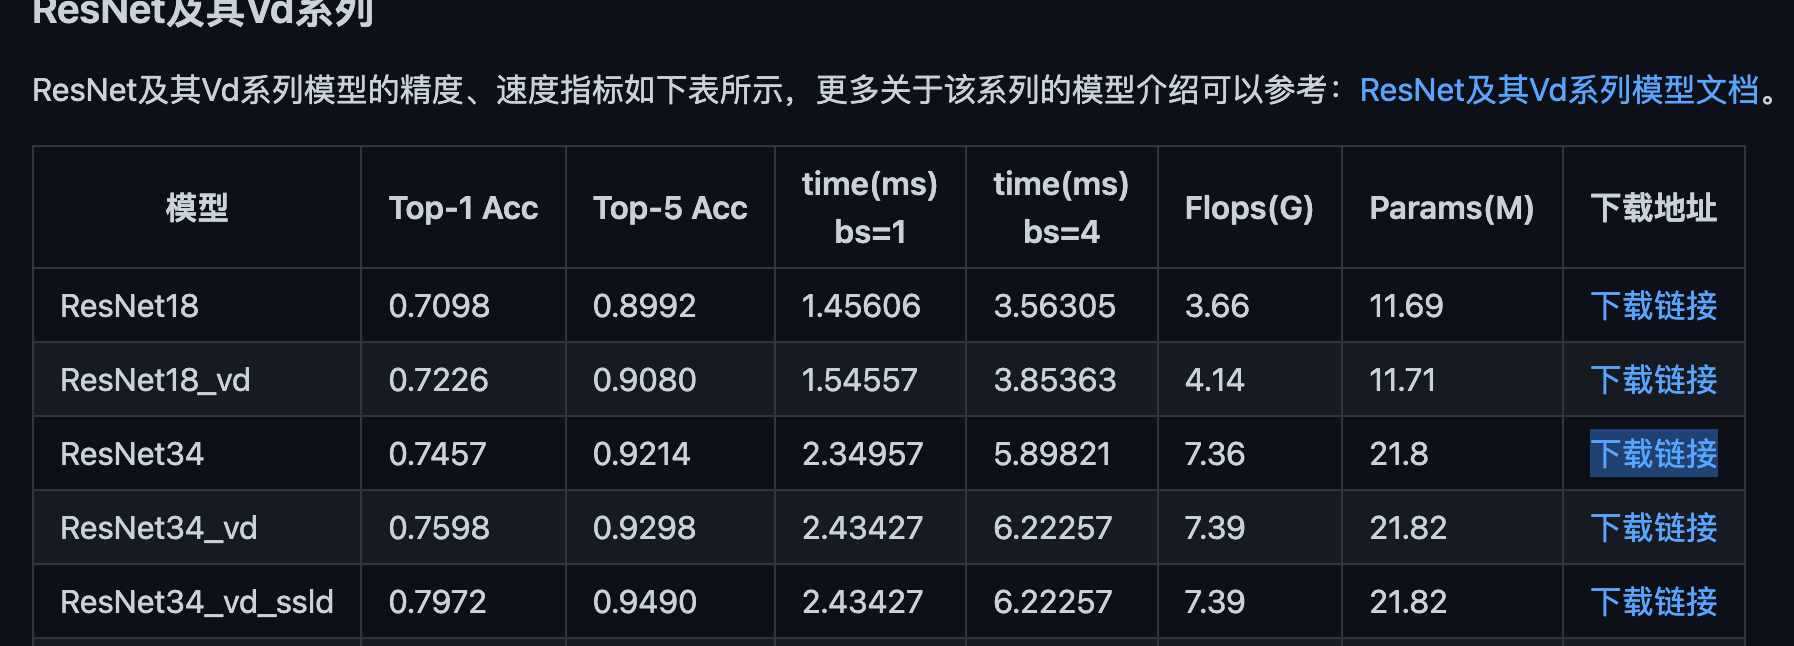

通过使用配置文件与预训练模型可训练骨干网络backbone，如MNet以及ResNet等。

预训练模型解压后包含.pdparams、.pdopt、.states等文件，主要体现为训练过程中保存的模型参数、优化器状态和训练信息。

In [1]:
!wget -P ./pretrain_models/ https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet34_pretrained.pdparams

--2022-05-26 09:25:47--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet34_pretrained.pdparams
正在解析主机 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|182.61.200.229|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 131899164 (126M) [application/octet-stream]
正在保存至: “./pretrain_models/ResNet34_pretrained.pdparams”

ResNet34_pretrained 100%[===================>] 125.79M  22.5MB/s    in 8.4s    

2022-05-26 09:25:55 (15.0 MB/s) - 已保存 “./pretrain_models/ResNet34_pretrained.pdparams” [131899164/131899164])



In [6]:
!pwd
# PP-OCR mobile检测模型下载与解压
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/dygraph/ResNet34_pretrained.tar
!cd pretrain_models/ && tar xf ch_ppocr_mobile_v2.0_det_train.tar
# https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet34_pretrained.pdparams

/home/aistudio/work/PaddleOCR
--2022-05-26 01:11:50--  https://paddleocr.bj.bcebos.com/dygraph/ResNet34_pretrained.tar
正在解析主机 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.229|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 404 Not Found
2022-05-26 01:11:50 错误 404：Not Found。

tar: ch_ppocr_mobile_v2.0_det_train.tar：无法 open: 没有那个文件或目录
tar: Error is not recoverable: exiting now


### 2.3 模型训练与评估
#### 2.3.1 配置文件修改
结合选择训练的骨干网络，如训练DB是MNetV3的网络，可结合训练、测试数据集，修改config文件，config文件可应用于训练以及评估。 修改配置文件需要注意以下几点：
1)db网络模型选择
2)对应的数据集位置

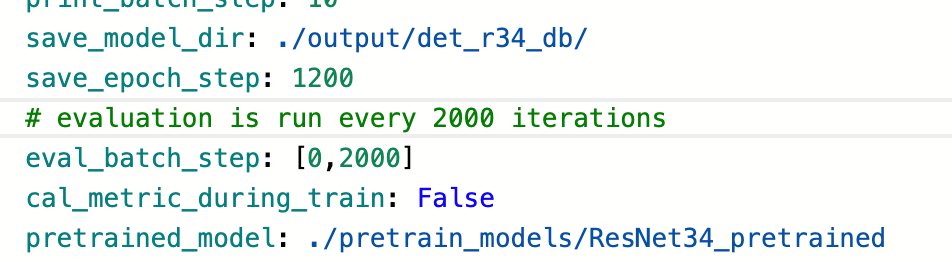

#### 2.3.2启动训练
训练平台使用AI Studio,通过-c选择与模型相同的配置文件

In [4]:
# 单机单卡训练
%cd ~/work/PaddleOCR/
!python3 tools/train.py -c ./configs/det/det_r34_db.yml

/home/aistudio/work/PaddleOCR
[2022/05/26 09:45:06] ppocr INFO: Architecture : 
[2022/05/26 09:45:06] ppocr INFO:     Backbone : 
[2022/05/26 09:45:06] ppocr INFO:         layers : 34
[2022/05/26 09:45:06] ppocr INFO:         name : ResNet
[2022/05/26 09:45:06] ppocr INFO:     Head : 
[2022/05/26 09:45:06] ppocr INFO:         k : 34
[2022/05/26 09:45:06] ppocr INFO:         name : DBHead
[2022/05/26 09:45:06] ppocr INFO:     Neck : 
[2022/05/26 09:45:06] ppocr INFO:         name : DBFPN
[2022/05/26 09:45:06] ppocr INFO:         out_channels : 256
[2022/05/26 09:45:06] ppocr INFO:     Transform : None
[2022/05/26 09:45:06] ppocr INFO:     algorithm : DB
[2022/05/26 09:45:06] ppocr INFO:     model_type : det
[2022/05/26 09:45:06] ppocr INFO: Eval : 
[2022/05/26 09:45:06] ppocr INFO:     dataset : 
[2022/05/26 09:45:06] ppocr INFO:         data_dir : ./train_data
[2022/05/26 09:45:06] ppocr INFO:         label_file_list : ['./train_data/Research_val/label.txt']
[2022/05/26 09:45:06] ppocr

#### 2.3.3 断点训练
当程序中值后，重新启动训练可通过Global.checkpoints读入之前训练的权重./output/det_r34_db/latest

In [5]:
!python3 tools/train.py -c ./configs/det/det_r34_db.yml -o Global.checkpoints="./output/det_r34_db/latest"


[2022/05/26 10:19:23] ppocr INFO: Architecture : 
[2022/05/26 10:19:23] ppocr INFO:     Backbone : 
[2022/05/26 10:19:23] ppocr INFO:         layers : 34
[2022/05/26 10:19:23] ppocr INFO:         name : ResNet
[2022/05/26 10:19:23] ppocr INFO:     Head : 
[2022/05/26 10:19:23] ppocr INFO:         k : 34
[2022/05/26 10:19:23] ppocr INFO:         name : DBHead
[2022/05/26 10:19:23] ppocr INFO:     Neck : 
[2022/05/26 10:19:23] ppocr INFO:         name : DBFPN
[2022/05/26 10:19:23] ppocr INFO:         out_channels : 256
[2022/05/26 10:19:23] ppocr INFO:     Transform : None
[2022/05/26 10:19:23] ppocr INFO:     algorithm : DB
[2022/05/26 10:19:23] ppocr INFO:     model_type : det
[2022/05/26 10:19:23] ppocr INFO: Eval : 
[2022/05/26 10:19:23] ppocr INFO:     dataset : 
[2022/05/26 10:19:23] ppocr INFO:         data_dir : ./train_data
[2022/05/26 10:19:23] ppocr INFO:         label_file_list : ['./train_data/Research_val/label.txt']
[2022/05/26 10:19:23] ppocr INFO:         name : SimpleDa

#### 2.3.4 测试集评估
PaddleOCR计算三个OCR检测相关的指标，分别是：Precision、Recall、H-mean（F-Score）。

训练中模型参数默认保存在Global.save_model_dir目录下。在评估指标时，需要设置Global.checkpoints指向保存的参数文件。

由于训练过程太久，中途暂停，结果不是很好：
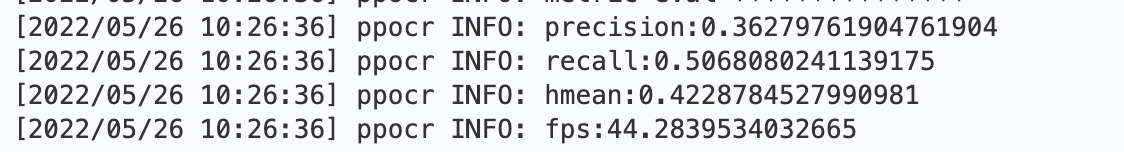

In [6]:
%cd ~/work/PaddleOCR/
!python3 tools/eval.py -c ./configs/det/det_r34_db.yml -o Global.checkpoints="./output/det_r34_db/latest"

/home/aistudio/work/PaddleOCR
[2022/05/26 10:23:41] ppocr INFO: Architecture : 
[2022/05/26 10:23:41] ppocr INFO:     Backbone : 
[2022/05/26 10:23:41] ppocr INFO:         layers : 34
[2022/05/26 10:23:41] ppocr INFO:         name : ResNet
[2022/05/26 10:23:41] ppocr INFO:     Head : 
[2022/05/26 10:23:41] ppocr INFO:         k : 34
[2022/05/26 10:23:41] ppocr INFO:         name : DBHead
[2022/05/26 10:23:41] ppocr INFO:     Neck : 
[2022/05/26 10:23:41] ppocr INFO:         name : DBFPN
[2022/05/26 10:23:41] ppocr INFO:         out_channels : 256
[2022/05/26 10:23:41] ppocr INFO:     Transform : None
[2022/05/26 10:23:41] ppocr INFO:     algorithm : DB
[2022/05/26 10:23:41] ppocr INFO:     model_type : det
[2022/05/26 10:23:41] ppocr INFO: Eval : 
[2022/05/26 10:23:41] ppocr INFO:     dataset : 
[2022/05/26 10:23:41] ppocr INFO:         data_dir : ./train_data
[2022/05/26 10:23:41] ppocr INFO:         label_file_list : ['./train_data/Research_val/label.txt']
[2022/05/26 10:23:41] ppocr

### 2.4 结果可视化

#### 2.4.1 模型发布
将训练好且验证通过的模型发布为推理模型，即inference模型

通过PP-OCR提供的export模块导出，导出需要加载配置文件，并从训练结果目录中加载latest模型。

推理模型按照save_inference_dir定义的路径保存。

In [7]:
!python3 tools/export_model.py -c ./configs/det/det_r34_db.yml -o Global.pretrained_model="./output/det_r34_db/latest" Global.save_inference_dir="./output/r34_inference/"

W0526 10:33:17.081288  4816 gpu_context.cc:278] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W0526 10:33:17.086545  4816 gpu_context.cc:306] device: 0, cuDNN Version: 7.6.
[2022/05/26 10:33:21] ppocr INFO: load pretrain successful from ./output/det_r34_db/latest
[2022/05/26 10:33:25] ppocr INFO: inference model is saved to ./output/r34_inference/inference


#### 2.4.2 结果可视化
自定义图片，结果如下：
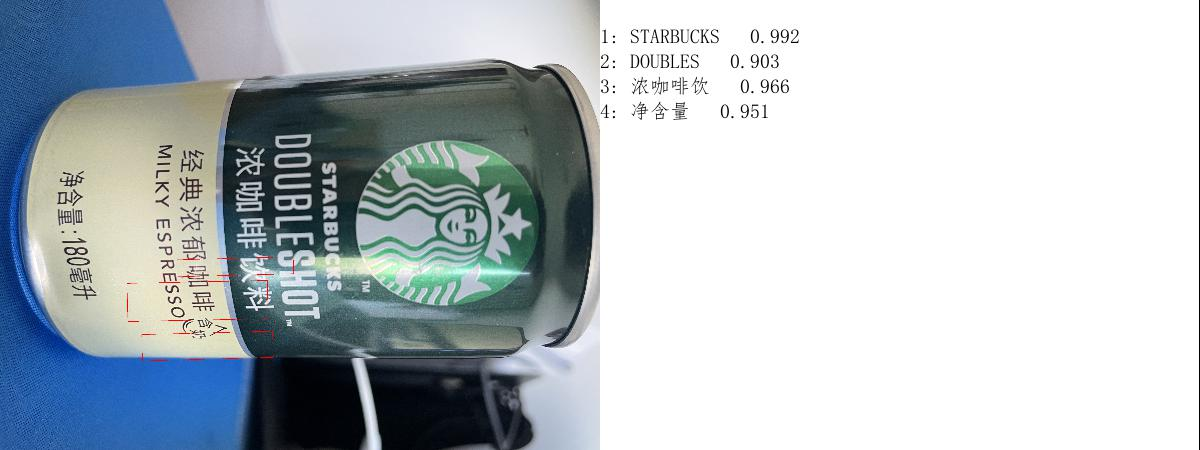

In [12]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(det_model_dir='./output/r34_inference',
                use_angle_cls=True)
img_path = '/home/aistudio/work/star.jpg'
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)
# 显示结果
from PIL import Image

image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result_star.jpg')

[2022/05/26 10:42:20] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/aistudio/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='./output/r34_inference', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_sc

#### 修改超参数

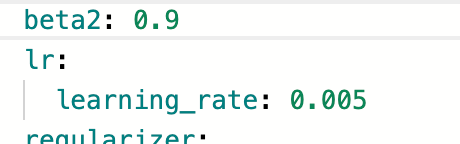

基于之前训练的网络断点，重新训练：
在训练490次的时候loss达到1.77
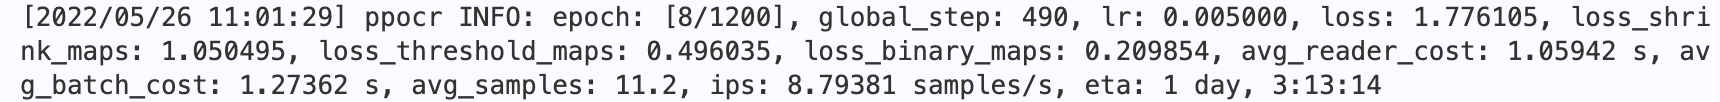

之前lr=0.001，k=34的参数下，需要训练1000次之后loss才能下降到1.77左右。

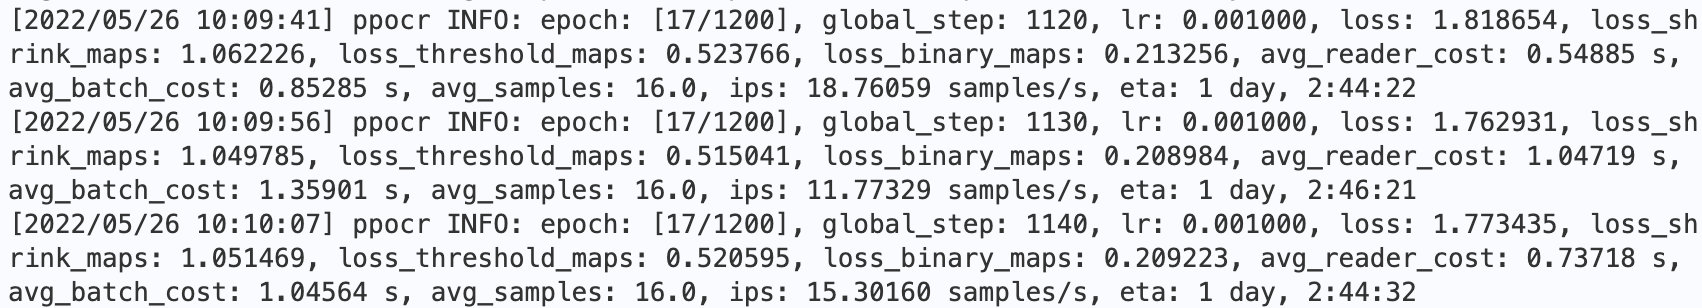

In [14]:
%cd ~/work/PaddleOCR/
!python3 tools/train.py -c ./configs/det/det_r34_db.yml -o Global.checkpoints="./output/det_r34_db/latest"


/home/aistudio/work/PaddleOCR
[2022/05/26 10:50:36] ppocr INFO: Architecture : 
[2022/05/26 10:50:36] ppocr INFO:     Backbone : 
[2022/05/26 10:50:36] ppocr INFO:         layers : 34
[2022/05/26 10:50:36] ppocr INFO:         name : ResNet
[2022/05/26 10:50:36] ppocr INFO:     Head : 
[2022/05/26 10:50:36] ppocr INFO:         k : 50
[2022/05/26 10:50:36] ppocr INFO:         name : DBHead
[2022/05/26 10:50:36] ppocr INFO:     Neck : 
[2022/05/26 10:50:36] ppocr INFO:         name : DBFPN
[2022/05/26 10:50:36] ppocr INFO:         out_channels : 256
[2022/05/26 10:50:36] ppocr INFO:     Transform : None
[2022/05/26 10:50:36] ppocr INFO:     algorithm : DB
[2022/05/26 10:50:36] ppocr INFO:     model_type : det
[2022/05/26 10:50:36] ppocr INFO: Eval : 
[2022/05/26 10:50:36] ppocr INFO:     dataset : 
[2022/05/26 10:50:36] ppocr INFO:         data_dir : ./train_data
[2022/05/26 10:50:36] ppocr INFO:         label_file_list : ['./train_data/Research_val/label.txt']
[2022/05/26 10:50:36] ppocr

训练结果评估

In [15]:
%cd ~/work/PaddleOCR/
!python3 tools/eval.py -c ./configs/det/det_r34_db.yml -o Global.checkpoints="./output/det_r34_db/latest"

/home/aistudio/work/PaddleOCR
[2022/05/26 11:11:02] ppocr INFO: Architecture : 
[2022/05/26 11:11:02] ppocr INFO:     Backbone : 
[2022/05/26 11:11:02] ppocr INFO:         layers : 34
[2022/05/26 11:11:02] ppocr INFO:         name : ResNet
[2022/05/26 11:11:02] ppocr INFO:     Head : 
[2022/05/26 11:11:02] ppocr INFO:         k : 50
[2022/05/26 11:11:02] ppocr INFO:         name : DBHead
[2022/05/26 11:11:02] ppocr INFO:     Neck : 
[2022/05/26 11:11:02] ppocr INFO:         name : DBFPN
[2022/05/26 11:11:02] ppocr INFO:         out_channels : 256
[2022/05/26 11:11:02] ppocr INFO:     Transform : None
[2022/05/26 11:11:02] ppocr INFO:     algorithm : DB
[2022/05/26 11:11:02] ppocr INFO:     model_type : det
[2022/05/26 11:11:02] ppocr INFO: Eval : 
[2022/05/26 11:11:02] ppocr INFO:     dataset : 
[2022/05/26 11:11:02] ppocr INFO:         data_dir : ./train_data
[2022/05/26 11:11:02] ppocr INFO:         label_file_list : ['./train_data/Research_val/label.txt']
[2022/05/26 11:11:02] ppocr

没有完整的运行完，训练了900次暂停，与之前训练1500次的结果对比如下,精度有所提升，之后有时间可以跑完整个训练次数。

**older：**
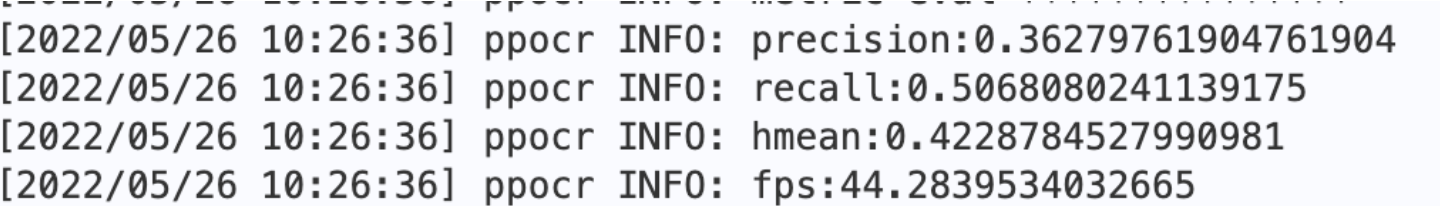

**newer:**
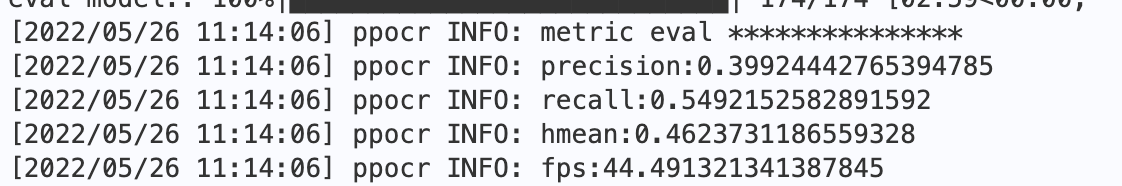
